In [2]:
import pandas as pd
import numpy as np

### Загружаем необходимые данные - Supermart Grocery Sales

In [4]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [5]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
df['Sales'].describe()

,Sales
count,9994.000000
mean,1496.596158
std,577.559036
min,500.000000
25%,1000.000000
50%,1498.000000
75%,1994.750000
max,2500.000000


### Приводим колонку с данными по датам к соотвествующему типу

In [8]:
df['Order ID'].value_counts()

,count
Order ID,
OD1,1
OD6666,1
OD6659,1
OD6660,1
OD6661,1
...,...
OD3333,1
OD3334,1
OD3335,1


In [9]:
df = df.set_index('Order ID')

In [10]:
df

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Order ID,,,,,,,,,,
OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...
OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, OD1 to OD9994
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  9994 non-null   object        
 1   Category       9994 non-null   object        
 2   Sub Category   9994 non-null   object        
 3   City           9994 non-null   object        
 4   Order Date     9994 non-null   datetime64[ns]
 5   Region         9994 non-null   object        
 6   Sales          9994 non-null   int64         
 7   Discount       9994 non-null   float64       
 8   Profit         9994 non-null   float64       
 9   State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 858.9+ KB


### Создаем новые признаки их колонки с датами. Год и месяц

In [14]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [15]:
df.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month
Order ID,,,,,,,,,,,,
OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10


### Сколько всего товаров продано в городе Vellore с группировкой по годам. В конце сохранить все в файл

In [19]:
df.query('City == "Vellore"').groupby('Year').agg({'Sales':'sum'}).to_csv('123.csv')

### Объемы продаж по Category и Sub Category. Сортировка по убыванию и переименование колонки объемов продаж. В конце график круговая диаграмма.

<Axes: ylabel='Total'>

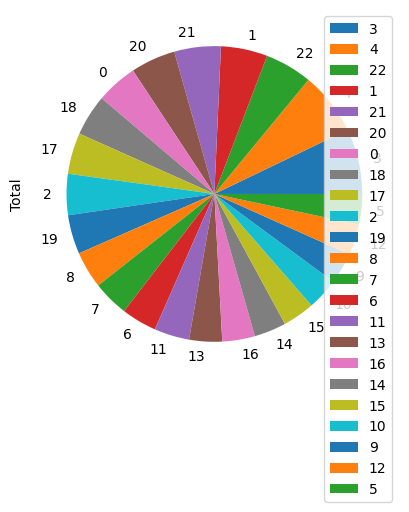

In [29]:
df.groupby(['Category','Sub Category'], as_index=False)\
      .agg({'Profit':'sum'})\
      .sort_values(by='Profit', ascending=False)\
      .rename(columns = {'Profit':'Total'})\
      .plot(y = 'Total',kind='pie')

### Общая сумма продаж по Category и Sub Category в июне 2017 году

In [37]:
df.query('(Month == 6) & (Year == 2017)').groupby(['Category','Sub Category'],as_index=False).agg({'Profit':'mean'})

,Category,Sub Category,Profit
0,Bakery,Biscuits,369.322727
1,Bakery,Breads & Buns,306.860000
2,Bakery,Cakes,442.002500
3,Beverages,Health Drinks,312.238333
4,Beverages,Soft Drinks,386.770000
5,"Eggs, Meat & Fish",Chicken,339.205000
6,"Eggs, Meat & Fish",Eggs,480.573750
7,"Eggs, Meat & Fish",Fish,419.825714
8,"Eggs, Meat & Fish",Mutton,360.421429
9,Food Grains,Atta & Flour,437.451429


### Общая сумма продаж по Region и City в месяце августе

In [38]:
df.query('Month == 8').groupby(['Region','City'],as_index=False).agg({'Profit':np.median,'Sales':['count','sum']})

<ipython-input-38-f7651a0cbe73>:1: FutureWarning: The provided callable <function median at 0x7bbe5052cca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.query('Month == 8').groupby(['Region','City'],as_index=False).agg({'Profit':np.median,'Sales':['count','sum']})


Region          City   Profit Sales       
                            median count    sum
0   Central          Bodi  336.865     6   8898
1   Central       Chennai  399.165    10  13985
2   Central    Coimbatore  250.760     8  11213
3   Central        Cumbum  414.460     5   7186
4   Central    Dharmapuri  331.650     7  10645
..      ...           ...      ...   ...    ...
91     West   Tirunelveli  346.980    14  20141
92     West        Trichy  219.800    10  13965
93     West       Vellore  334.145    12  16907
94     West    Viluppuram  394.950    10  15801
95     West  Virudhunagar  225.270    12  18450

[96 rows x 5 columns]

## Сводные таблицы

#### Средняя по продажам по регионам. Используем сводные таблицы, которые возвращают уже среднее значение по индексу. Используем дополнительные функции для округления, сброса / установки индекса и построения графика

In [40]:
df.pivot_table(index='Year', values='Profit')

,Profit
Year,
2015,377.586106
2016,379.254515
2017,368.463943
2018,375.659082


#### Мы можем использовать параметр aggfunc для расчета разных статистик

In [41]:
df.pivot_table(index='Year', values='Profit', aggfunc=['sum','mean'])

,sum,mean
,Profit,Profit
Year,,
2015,752529.11,377.586106
2016,797192.99,379.254515
2017,953216.22,368.463943
2018,1244182.88,375.659082


#### Среднее значение по дохододам и категориям товаров по региону. Поскольку сводные таблицы считают среднее автоматически, нам надо всего лишь добавить колонки, по которым мы хотим данный расчет

In [42]:
df.pivot_table(index='Region', values='Profit', columns='Category', aggfunc=['sum'])

sum                                                            \
Category     Bakery  Beverages Eggs, Meat & Fish Food Grains Fruits & Veggies   
Region                                                                          
Central   109543.91  128017.14         126587.35   111517.05        131699.53   
East      153741.06  144498.17         164465.08   154932.01        141292.78   
North           NaN        NaN               NaN         NaN              NaN   
South      89102.07   84058.78          93728.18    94823.55         92961.26   
West      176134.02  169031.67         182576.61   167890.03        164446.81   

                                  
Category Oil & Masala     Snacks  
Region                            
Central     109261.91  140179.95  
East        155569.22  159847.26  
North          401.28        NaN  
South        73909.18   94979.87  
West        158753.70  173171.77

#### Мы можем использовать функционал сводных таблиц для заполнения пропущенных значений 0, используя параметр FILL_VALUE

In [45]:
df.pivot_table(index='Region', values='Profit',columns='Category', aggfunc=['sum'], fill_value=0)

sum                                                            \
Category     Bakery  Beverages Eggs, Meat & Fish Food Grains Fruits & Veggies   
Region                                                                          
Central   109543.91  128017.14         126587.35   111517.05        131699.53   
East      153741.06  144498.17         164465.08   154932.01        141292.78   
North          0.00       0.00              0.00        0.00             0.00   
South      89102.07   84058.78          93728.18    94823.55         92961.26   
West      176134.02  169031.67         182576.61   167890.03        164446.81   

                                  
Category Oil & Masala     Snacks  
Region                            
Central     109261.91  140179.95  
East        155569.22  159847.26  
North          401.28       0.00  
South        73909.18   94979.87  
West        158753.70  173171.77

#### Мы можем добавить итоги по строкам и колонкам используя параметр MARGINS. По умолчанию среднее

In [46]:
df.pivot_table(index='Region', values='Profit',columns=['Category'], aggfunc=['sum'], fill_value=0, margins=True)

sum                                                            \
Category     Bakery  Beverages Eggs, Meat & Fish Food Grains Fruits & Veggies   
Region                                                                          
Central   109543.91  128017.14         126587.35   111517.05        131699.53   
East      153741.06  144498.17         164465.08   154932.01        141292.78   
North          0.00       0.00              0.00        0.00             0.00   
South      89102.07   84058.78          93728.18    94823.55         92961.26   
West      176134.02  169031.67         182576.61   167890.03        164446.81   
All       528521.06  525605.76         567357.22   529162.64        530400.38   

                                              
Category Oil & Masala     Snacks         All  
Region                                        
Central     109261.91  140179.95   856806.84  
East        155569.22  159847.26  1074345.58  
North          401.28       0.00      401.28  
South        73909.18   94979.87   623562.89  
West        158753.70  173171.77  1192004.61  
All         497895.29  568178.85  3747121.20